In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [2]:
# !pip install plotnine  # 시각화 라이브러리 => R에 시각화 하는 방법과 유사하게 시각화 한다.
# !pip install missingno # 누락값(결측치)을 시각화 하는 라이브러리
from plotnine import *
import missingno as msno

In [3]:
# 데이터 다운로드 => https://www.data.go.kr/dataset/3035522/fileData.do
# 2015년 10월부터 2018년 7월까지 주택 분양 보증을 받아서 분양한 전체 민간 아파트 신규 분양가격 동향

In [4]:
# 현재 화면에 보이는 소스 프로그램의 위치(경로)를 보여준다.
%pwd

'D:\\kookgi_11gi\\PythonBigData\\workspace'

In [5]:
# 현재 화면에 보이는 소스 프로그램의 위치에 저장된 파일 목록을 보여준다.
# 현재 폴더 아래에 위치한 폴더에 저장된 파일 목록을 보고싶다면 '%ls 폴더이름'으로 실행한다.
%ls data

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4089-A2ED

 D:\kookgi_11gi\PythonBigData\workspace\data 디렉터리

2021-11-08  오전 11:19    <DIR>          .
2021-11-08  오전 11:19    <DIR>          ..
2020-03-24  오후 10:45           326,362 a_new_hope.txt
2020-03-24  오후 10:09           148,570 alice.txt
2020-03-24  오후 11:22           416,516 alice_color.png
2020-03-24  오후 10:09             7,339 alice_mask.png
2021-11-03  오후 01:42               587 concat.zip
2018-09-05  오전 11:23                61 concat_1.csv
2018-09-05  오전 11:23                61 concat_2.csv
2018-09-05  오전 11:23                69 concat_3.csv
2018-09-05  오전 11:23             5,796 country_timeseries.csv
2018-09-05  오전 11:23            83,637 gapminder.tsv
2020-03-25  오전 12:30            99,957 korea_mask.jpg
2021-11-04  오전 09:28             1,063 merge.zip
2018-09-05  오전 11:23               984 pew.csv
2020-06-17  오후 03:09           131,206 preSale_2018_6.csv
2018-09-05  오전 11:23               442 scientists.csv
2021-09-15  오후 08:08     

In [6]:
# read_csv() 함수로 읽어들이는 csv 파일이 한글 인코딩 문제로 에러가 발생되서 읽어오지 못할 경우가 있다.
# pd.read_csv('./data/전국_평균_분양가격_2018.6월_.csv') # 이 문장에서 에러가 발생된다면 아래와 같이 실행한다.
# pd.read_csv('./data/전국_평균_분양가격_2018.6월_.csv', encoding='euc-kr', engine='python')
pre_sale = pd.read_csv('./data/preSale_2018_6.csv')
pre_sale.shape

(2805, 5)

In [7]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [8]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN
2804,제주,전용면적 102㎡초과,2018,6,3029


In [9]:
# dtypes 속성이나 info() 함수를 이용해서 데이터프레임을 구성하는 데이터 타입을 확인하고 필요하다면 데이터 타입을 변경한다.
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [10]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2805 non-null   object
 1   규모구분     2805 non-null   object
 2   연도       2805 non-null   int64 
 3   월        2805 non-null   int64 
 4   분양가격(㎡)  2674 non-null   object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [11]:
# 연도와 월은 연산에 사용할 데이터가 아니라 구분에 사용되는 데이터이므로 문자열 형태로 변환한다.
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)
pre_sale.dtypes

지역명        object
규모구분       object
연도         object
월          object
분양가격(㎡)    object
dtype: object

In [12]:
# 분양가격 데이터 타입을 숫자로 변경하고 평당분양가격을 계산한다.
# pre_sale['분양가격(㎡)'] = pre_sale['분양가격(㎡)'].astype(float)
# to_numeric() 함수의 error 속성을 coerce로 지정하면 오류가 발생된 데이터를 누락값으로 변경한다.
pre_sale['분양가격(㎡)'] = pd.to_numeric(pre_sale['분양가격(㎡)'], errors='coerce')
pre_sale['평당분양가격'] = pre_sale['분양가격(㎡)'] * 3.3
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)    float64
평당분양가격     float64
dtype: object

In [13]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [14]:
# isnull() 또는 isna() 함수와 sum() 함수를 사용해서 누락값이 존재하는가 확인하기
print(pre_sale.isnull().sum())
print(pre_sale.isna().sum())

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    223
평당분양가격     223
dtype: int64
지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    223
평당분양가격     223
dtype: int64


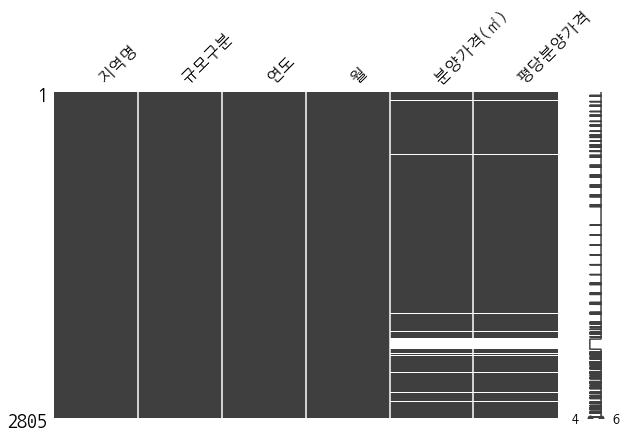

In [15]:
# missingno 라이브러리로 그래프를 그려서 누락값 확인하기 => 중간 중간에 흰색으로 보이는 부분이 누락값이다.
msno.matrix(pre_sale, figsize=[10, 6])
plt.show()

In [16]:
# 2017년 데이터만 추출한다.
pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']
pre_sale_2017

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
1275,서울,전체,2017,1,6450.0,21285.0
1276,서울,전용면적 60㎡이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60㎡초과 85㎡이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85㎡초과 102㎡이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102㎡초과,2017,1,6771.0,22344.3
...,...,...,...,...,...,...
2290,제주,전체,2017,12,3578.0,11807.4
2291,제주,전용면적 60㎡이하,2017,12,5380.0,17754.0
2292,제주,전용면적 60㎡초과 85㎡이하,2017,12,3467.0,11441.1
2293,제주,전용면적 85㎡초과 102㎡이하,2017,12,NaN,NaN


In [17]:
pre_sale['지역명'].value_counts() # 시도별 데이터가 동일하게 저장되어 있다.

전북    165
전남    165
울산    165
경북    165
서울    165
제주    165
충북    165
광주    165
강원    165
경남    165
부산    165
충남    165
인천    165
경기    165
대구    165
대전    165
세종    165
Name: 지역명, dtype: int64

In [18]:
pre_sale['규모구분'].value_counts() # 규모구분별 데이터가 동일하게 저장되어 있다.

전체                   561
전용면적 60㎡초과 85㎡이하     561
전용면적 60㎡이하           561
전용면적 102㎡초과          561
전용면적 85㎡초과 102㎡이하    561
Name: 규모구분, dtype: int64

전국 평균 분양 가격

In [19]:
# pd.options.display.float_format 속성을 사용해서 데이터프레임에 저장된 숫자 데이터가 화면에 표시될 출력 서식을 지정할 수 있다.
# 출력서식 {:,.1f}는 천 단위마다 ','를 출력하고 '.'뒤의 숫자만큼 소수점 아래 자리수를 표현한다.
# 'f'를 붙이지 않으면 실수가 'e'를 사용하는 지수 형태로 표현된다.
pd.options.display.float_format = '{:,.1f}'.format

In [20]:
# describe() 함수로 데이터프레임에 저장된 숫자 데이터의 요약 통계량을 확인 할 수 있다.
pre_sale.groupby(pre_sale['연도']).describe()

분양가격(㎡)                                                         평당분양가격  \
       count    mean     std     min     25%     50%     75%     max  count   
연도                                                                            
2015   243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5 7,092.0  243.0   
2016   984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5 8,096.0  984.0   
2017   899.0 3,139.5 1,107.6 1,976.0 2,365.0 2,849.0 3,456.0 7,887.0  899.0   
2018   456.0 3,299.4 1,199.3 2,076.0 2,470.5 2,912.5 3,647.2 8,098.0  456.0   

                                                                 
         mean     std     min     25%     50%      75%      max  
연도                                                               
2015  9,202.7 3,223.6 6,164.4 7,342.5 8,302.8  9,984.1 23,403.6  
2016  9,683.0 3,535.8 6,270.0 7,530.6 8,817.6 10,390.0 26,716.8  
2017 10,360.5 3,655.0 6,520.8 7,804.5 9,401.7 11,404.8 26,027.1  
2018 10,888.1 3,957.7 6,850.8 8,152.6 9,611.2 12,035.9 26,723.4

In [21]:
# describe() 함수 실행 결과에 'T' 속성을 지정하면 요약 통계량이 전치되서 수직 방향으로 출력된다.
pre_sale.groupby(pre_sale['연도']).describe().T 

연도                2015     2016     2017     2018
분양가격(㎡) count    243.0    984.0    899.0    456.0
        mean   2,788.7  2,934.2  3,139.5  3,299.4
        std      976.9  1,071.4  1,107.6  1,199.3
        min    1,868.0  1,900.0  1,976.0  2,076.0
        25%    2,225.0  2,282.0  2,365.0  2,470.5
        50%    2,516.0  2,672.0  2,849.0  2,912.5
        75%    3,025.5  3,148.5  3,456.0  3,647.2
        max    7,092.0  8,096.0  7,887.0  8,098.0
평당분양가격  count    243.0    984.0    899.0    456.0
        mean   9,202.7  9,683.0 10,360.5 10,888.1
        std    3,223.6  3,535.8  3,655.0  3,957.7
        min    6,164.4  6,270.0  6,520.8  6,850.8
        25%    7,342.5  7,530.6  7,804.5  8,152.6
        50%    8,302.8  8,817.6  9,401.7  9,611.2
        75%    9,984.1 10,390.0 11,404.8 12,035.9
        max   23,403.6 26,716.8 26,027.1 26,723.4

In [22]:
pre_sale.groupby(pre_sale.연도).describe().T 

연도                2015     2016     2017     2018
분양가격(㎡) count    243.0    984.0    899.0    456.0
        mean   2,788.7  2,934.2  3,139.5  3,299.4
        std      976.9  1,071.4  1,107.6  1,199.3
        min    1,868.0  1,900.0  1,976.0  2,076.0
        25%    2,225.0  2,282.0  2,365.0  2,470.5
        50%    2,516.0  2,672.0  2,849.0  2,912.5
        75%    3,025.5  3,148.5  3,456.0  3,647.2
        max    7,092.0  8,096.0  7,887.0  8,098.0
평당분양가격  count    243.0    984.0    899.0    456.0
        mean   9,202.7  9,683.0 10,360.5 10,888.1
        std    3,223.6  3,535.8  3,655.0  3,957.7
        min    6,164.4  6,270.0  6,520.8  6,850.8
        25%    7,342.5  7,530.6  7,804.5  8,152.6
        50%    8,302.8  8,817.6  9,401.7  9,611.2
        75%    9,984.1 10,390.0 11,404.8 12,035.9
        max   23,403.6 26,716.8 26,027.1 26,723.4

전국 규모별 평균 분양 가격

In [23]:
# pivot_table(values, index[, columns, aggfunc, fill_value])
# values: 통계 함수를 적용할 데이터프레임의 열을 지정한다.
# index: 그룹화의 첫 번째 기준으로 사용되는 피벗 테이블로 가져올 데이터프레임의 열을 지정한다. => 행 데이터
# columns: 그룹화의 두 번째 기준으로 사용되는 피벗 테이블로 가져올 데이터프레임의 열을 지정한다. => 열 데이터
# aggfunc: index와 columns로 그룹화된 values에 적용할 함수를 지정한다. => 기본값은 평균을 계산하는 함수 mean 이다.
# fill_value: NaN을 대체할 값을 지정한다. => 주로 0을 사용한다.
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837.2","10,388.7","11,334.5","11,259.8"
전용면적 60㎡이하,"8,951.5","9,398.9","10,246.1","10,957.3"
전용면적 60㎡초과 85㎡이하,"8,891.8","9,296.0","9,825.0","10,438.1"
전용면적 85㎡초과 102㎡이하,"9,518.5","10,122.4","10,540.4","11,456.8"
전체,"8,893.0","9,293.0","9,901.3","10,560.3"


In [24]:
# 규모구분이 전체로 되어있는 금액으로면 연도별 변동 금액을 살펴보자
# 규모구분이 전체인 데이터만 추출한다.
region_year_all = pre_sale[pre_sale['규모구분'] == '전체']
region_year_all

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,"5,841.0","19,275.3"
5,인천,전체,2015,10,"3,163.0","10,437.9"
10,경기,전체,2015,10,"3,138.0","10,355.4"
15,부산,전체,2015,10,"3,112.0","10,269.6"
20,대구,전체,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
2780,전북,전체,2018,6,"2,326.0","7,675.8"
2785,전남,전체,2018,6,"2,356.0","7,774.8"
2790,경북,전체,2018,6,"2,631.0","8,682.3"
2795,경남,전체,2018,6,"2,695.0","8,893.5"


In [25]:
# regoin_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도')
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
print(region_year.columns)
print(region_year.columns.name)
region_year.columns.name = ''
print(region_year.columns)
region_year

Index(['지역명', '2015', '2016', '2017', '2018'], dtype='object', name='연도')
연도
Index(['지역명', '2015', '2016', '2017', '2018'], dtype='object', name='')


,지역명,2015,2016,2017,2018
0,강원,"7,159.9","7,011.1","7,126.8","7,642.8"
1,경기,"10,377.4","11,220.0","11,850.0","12,854.0"
2,경남,"7,585.6","7,847.9","8,119.8","8,894.0"
3,경북,"7,170.9","7,360.7","7,794.9","8,261.6"
4,광주,"8,052.0","8,898.7","9,463.5","9,629.9"
5,대구,"9,232.3","10,310.0","11,455.8","11,651.7"
6,대전,"8,098.2","8,501.6","9,044.7","9,588.7"
7,부산,"10,307.0","10,429.9","11,577.9","12,709.9"
8,서울,"19,725.2","20,663.5","21,375.9","22,299.2"
9,세종,"8,750.5","8,860.5","9,135.3","10,381.8"


전국 지역별 평당분양가격 변동 금액

In [26]:
region_year['변동금액'] = region_year['2018'] - region_year['2015']
region_year

,지역명,2015,2016,2017,2018,변동금액
0,강원,"7,159.9","7,011.1","7,126.8","7,642.8",482.9
1,경기,"10,377.4","11,220.0","11,850.0","12,854.0","2,476.6"
2,경남,"7,585.6","7,847.9","8,119.8","8,894.0","1,308.4"
3,경북,"7,170.9","7,360.7","7,794.9","8,261.6","1,090.7"
4,광주,"8,052.0","8,898.7","9,463.5","9,629.9","1,577.9"
5,대구,"9,232.3","10,310.0","11,455.8","11,651.7","2,419.4"
6,대전,"8,098.2","8,501.6","9,044.7","9,588.7","1,490.5"
7,부산,"10,307.0","10,429.9","11,577.9","12,709.9","2,403.0"
8,서울,"19,725.2","20,663.5","21,375.9","22,299.2","2,574.0"
9,세종,"8,750.5","8,860.5","9,135.3","10,381.8","1,631.3"


In [27]:
# print(region_year['변동금액'].max())
# print(np.max(region_year['변동금액']))
max_delta_price = np.max(region_year['변동금액'])
print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승금액이 가장 큰 지역은 제주로 상승액은 평당 {:,.1f} 이다.'.
      format(max_delta_price))

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승금액이 가장 큰 지역은 제주로 상승액은 평당 5,335.6 이다.


In [28]:
min_delta_price = np.min(region_year['변동금액'])
min_delta_price

387.7499999999982

In [29]:
mean_delta_price = np.mean(region_year['변동금액'])
mean_delta_price

1667.276470588235

plotnine 패키지를 이용한 시각화

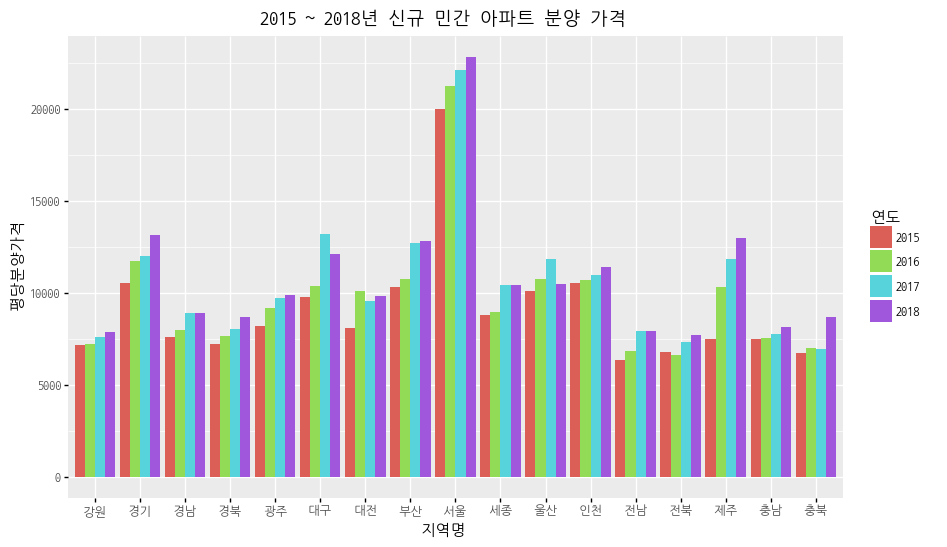

<ggplot: (-9223371876932408660)>

In [32]:
# 전국 지역별 평균 분양 가격 시각화
# ggplot(데이터프레임, aes(x='x축 데이터', y='y축 데이터', fill='범례'))
# geom_bar(stat='identity'): 막대 그래프, position 옵션을 지정하지 않으면 누적 막대그래프가 작성되고 'dodge'로 지정하면 일반
# 막대 그래프가 작성된다.
ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도')) \
    + geom_bar(stat='identity', position='dodge') \
    + ggtitle('2015 ~ 2018년 신규 민간 아파트 분양 가격') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=[10, 6])

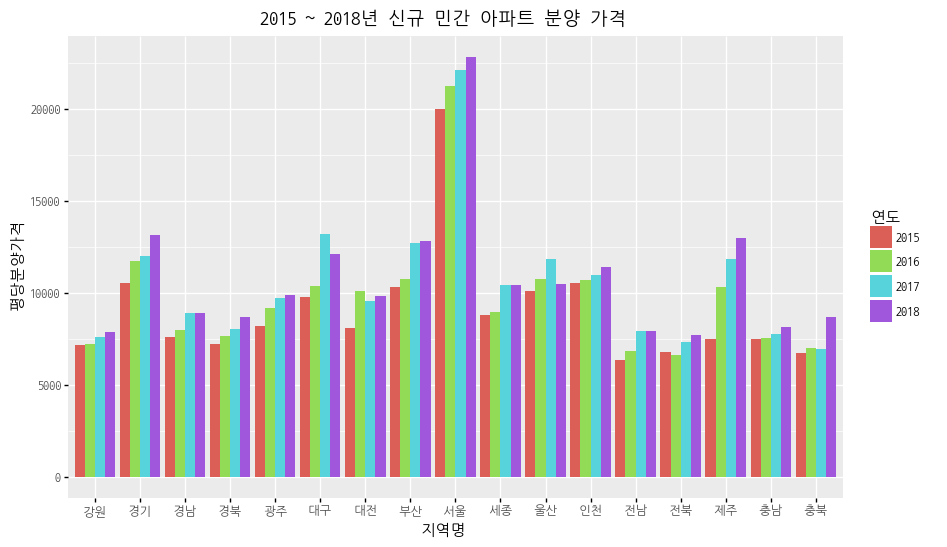

<ggplot: (159922603752)>

In [33]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
    + geom_bar(stat='identity', position='dodge')
    + ggtitle('2015 ~ 2018년 신규 민간 아파트 분양 가격')
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=[10, 6]))

In [36]:
# 규모별 지역별 평당분양가격 합계
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명', sum)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"251,862.6","435,246.9","295,092.6","274,744.8","269,910.3","393,699.9","171,388.8","402,675.9","705,104.4","296,280.6","249,361.2","428,904.3","241,589.7","249,381.0","302,606.7","271,256.7","252,813.0"
전용면적 60㎡이하,"229,911.0","393,587.7","266,250.6","244,675.2","229,336.8","360,112.5","282,097.2","341,002.2","703,220.1","253,984.5","224,119.5","347,298.6","223,360.5","229,878.0","382,206.0","248,707.8","222,436.5"
전용면적 60㎡초과 85㎡이하,"230,914.2","372,794.4","258,815.7","245,028.3","293,092.8","348,450.3","280,919.1","356,330.7","662,966.7","295,584.3","340,827.3","342,998.7","222,182.4","219,789.9","317,047.5","239,484.3","224,594.7"
전용면적 85㎡초과 102㎡이하,"182,688.0","384,918.6","314,694.6","219,407.1","176,625.9","227,924.4","234,973.2","351,063.9","758,844.9","294,726.3","115,193.1","361,142.1","251,446.8","232,158.3","236,359.2","236,662.8","260,637.3"
전체,"229,864.8","373,246.5","259,614.3","245,153.7","292,818.9","347,341.5","283,338.0","359,696.7","676,067.7","295,356.6","340,101.3","343,256.1","222,644.4","220,073.7","327,350.1","239,167.5","222,924.9"


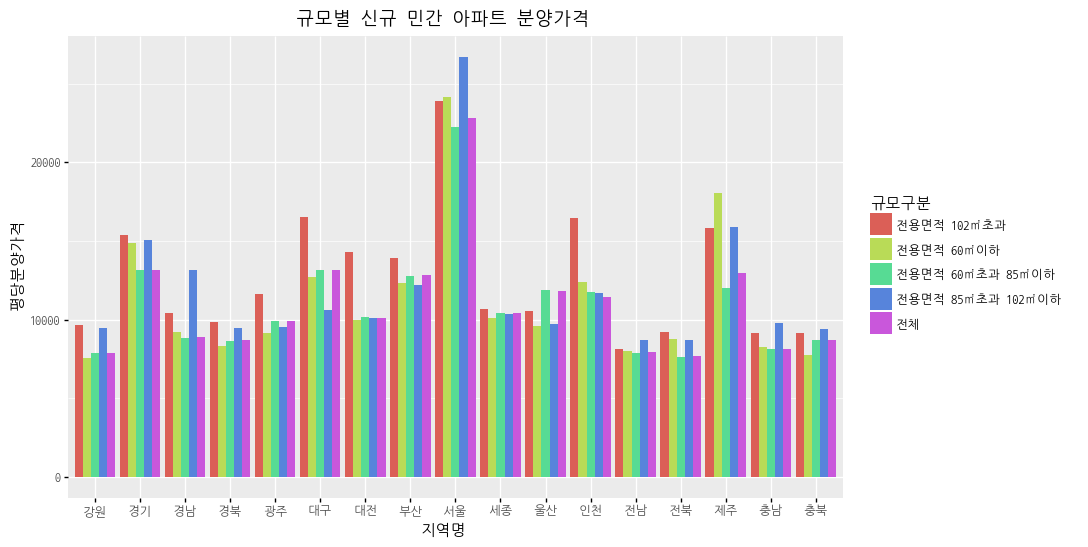

<ggplot: (159923720673)>

In [43]:
# 규모별 지역별 평당분양가격 합계 시각화
ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분')) \
    + geom_bar(stat='identity', position='dodge') \
    + ggtitle('규모별 신규 민간 아파트 분양가격') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=[10, 6])

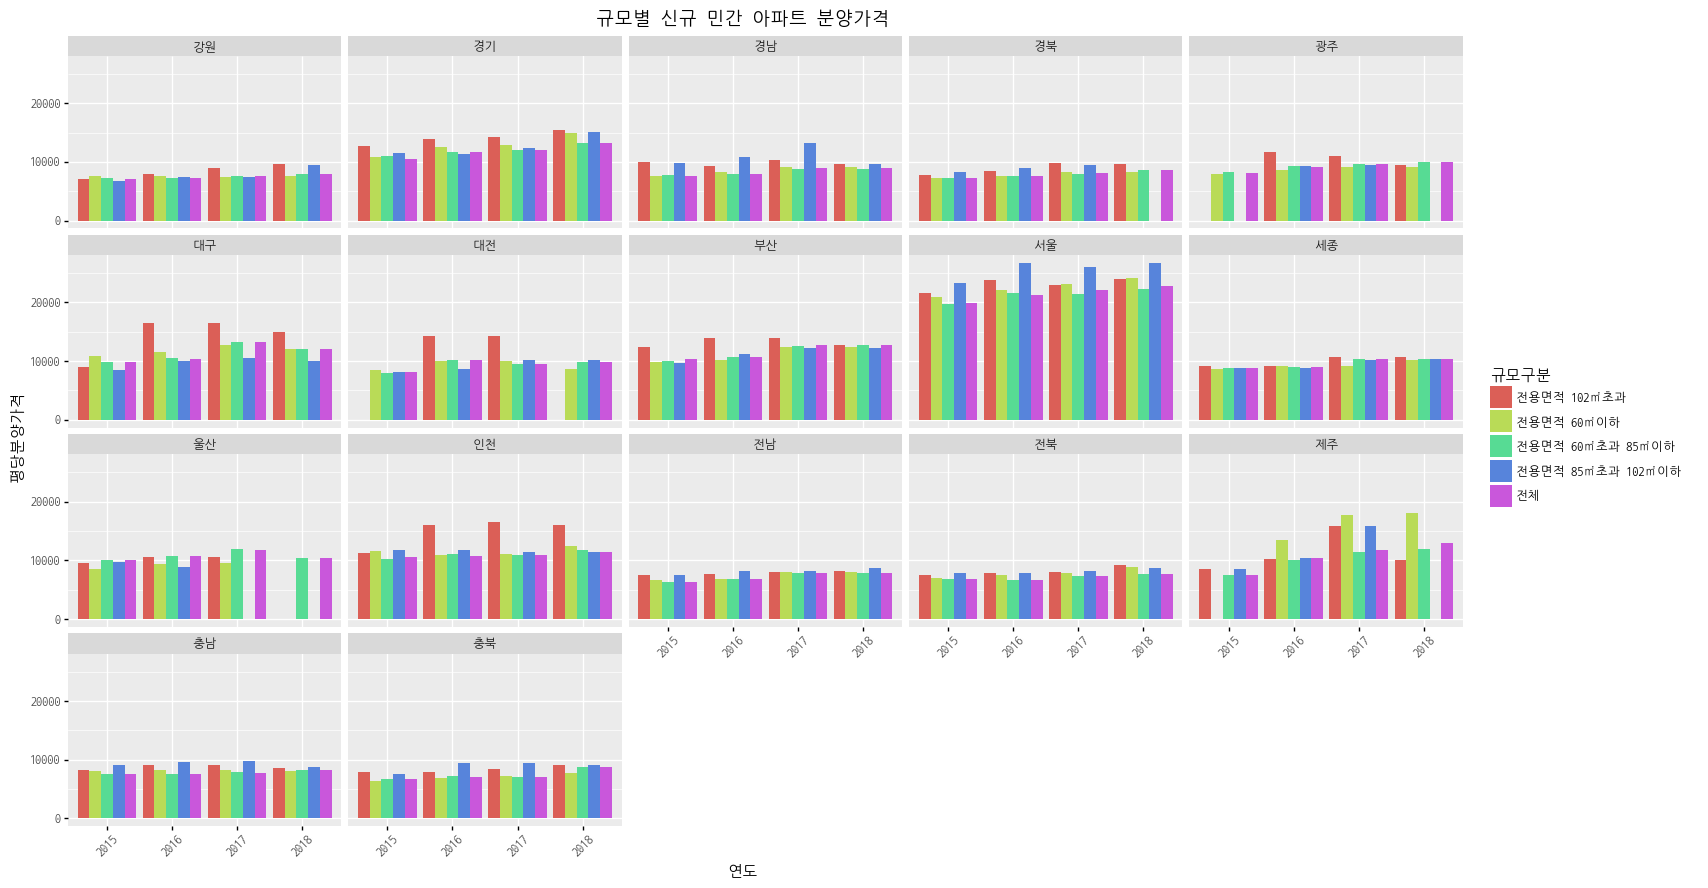

<ggplot: (-9223371876934239842)>

In [48]:
# 위의 그래프를 지역별로 보자
ggplot(pre_sale, aes(x='연도', y='평당분양가격', fill='규모구분')) \
    + geom_bar(stat='identity', position='dodge') \
    + facet_wrap('지역명') \
    + ggtitle('규모별 신규 민간 아파트 분양가격') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=[18, 10], axis_text_x=element_text(rotation=45))

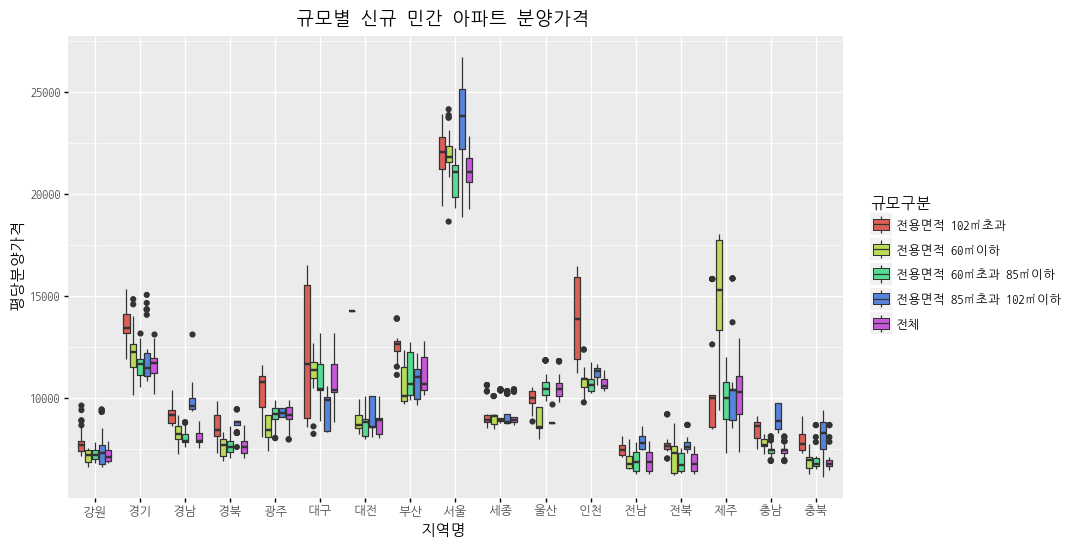

<ggplot: (159922671494)>

In [49]:
# boxplot을 그려보자
ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분')) \
    + geom_boxplot() \
    + ggtitle('규모별 신규 민간 아파트 분양가격') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=[10, 6])

In [50]:
# 사업 규모가 가장 큰 서울
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']
pre_sale_seoul

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60㎡이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102㎡초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
2720,서울,전체,2018,6,"6,694.0","22,090.2"
2721,서울,전용면적 60㎡이하,2018,6,"7,232.0","23,865.6"
2722,서울,전용면적 60㎡초과 85㎡이하,2018,6,"6,739.0","22,238.7"
2723,서울,전용면적 85㎡초과 102㎡이하,2018,6,"7,591.0","25,050.3"


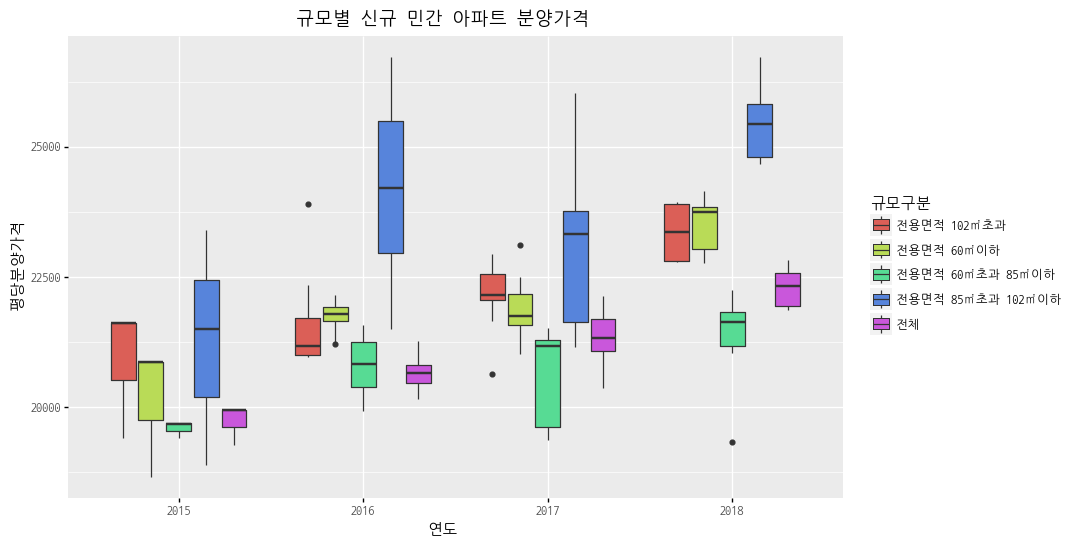

<ggplot: (-9223371876932144170)>

In [52]:
ggplot(pre_sale_seoul, aes(x='연도', y='평당분양가격', fill='규모구분')) \
    + geom_boxplot() \
    + ggtitle('규모별 신규 민간 아파트 분양가격') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=[10, 6])

In [53]:
# 분양가 차이가 가장 큰 제주
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']
pre_sale_jeju

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
80,제주,전체,2015,10,"2,232.0","7,365.6"
81,제주,전용면적 60㎡이하,2015,10,nan,nan
82,제주,전용면적 60㎡초과 85㎡이하,2015,10,"2,225.0","7,342.5"
83,제주,전용면적 85㎡초과 102㎡이하,2015,10,"2,583.0","8,523.9"
84,제주,전용면적 102㎡초과,2015,10,"2,574.0","8,494.2"
...,...,...,...,...,...,...
2800,제주,전체,2018,6,"3,925.0","12,952.5"
2801,제주,전용면적 60㎡이하,2018,6,"5,462.0","18,024.6"
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,"3,639.0","12,008.7"
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,nan,nan


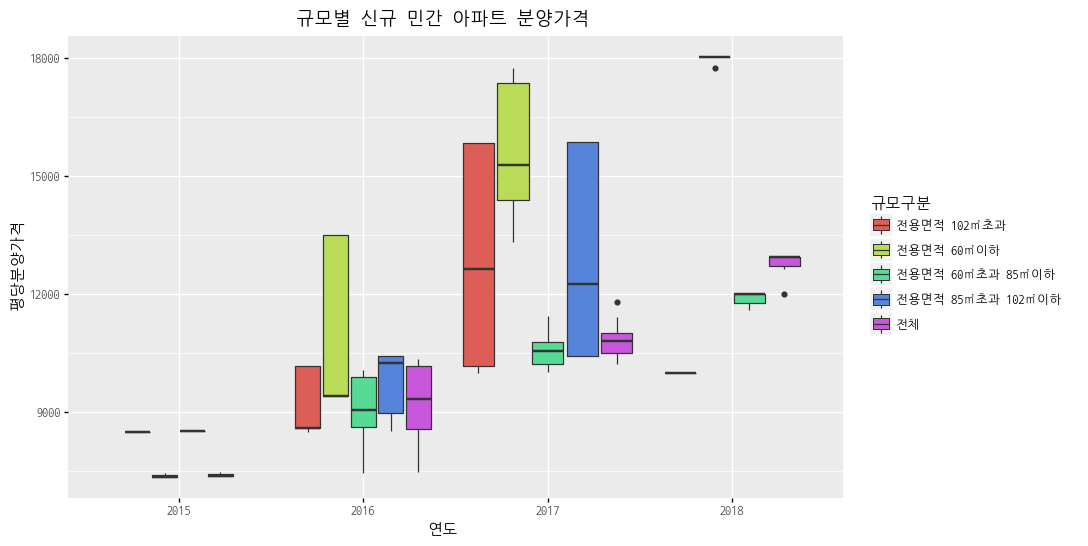

<ggplot: (159920748401)>

In [54]:
ggplot(pre_sale_jeju, aes(x='연도', y='평당분양가격', fill='규모구분')) \
    + geom_boxplot() \
    + ggtitle('규모별 신규 민간 아파트 분양가격') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=[10, 6])

In [55]:
# 분양가 차이가 가장 작은 울산
pre_sale_ulsan = pre_sale[pre_sale['지역명'] == '울산']
pre_sale_ulsan

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
35,울산,전체,2015,10,"3,053.0","10,074.9"
36,울산,전용면적 60㎡이하,2015,10,"2,422.0","7,992.6"
37,울산,전용면적 60㎡초과 85㎡이하,2015,10,"3,040.0","10,032.0"
38,울산,전용면적 85㎡초과 102㎡이하,2015,10,"2,951.0","9,738.3"
39,울산,전용면적 102㎡초과,2015,10,"2,690.0","8,877.0"
...,...,...,...,...,...,...
2755,울산,전체,2018,6,"3,125.0","10,312.5"
2756,울산,전용면적 60㎡이하,2018,6,nan,nan
2757,울산,전용면적 60㎡초과 85㎡이하,2018,6,"3,125.0","10,312.5"
2758,울산,전용면적 85㎡초과 102㎡이하,2018,6,nan,nan


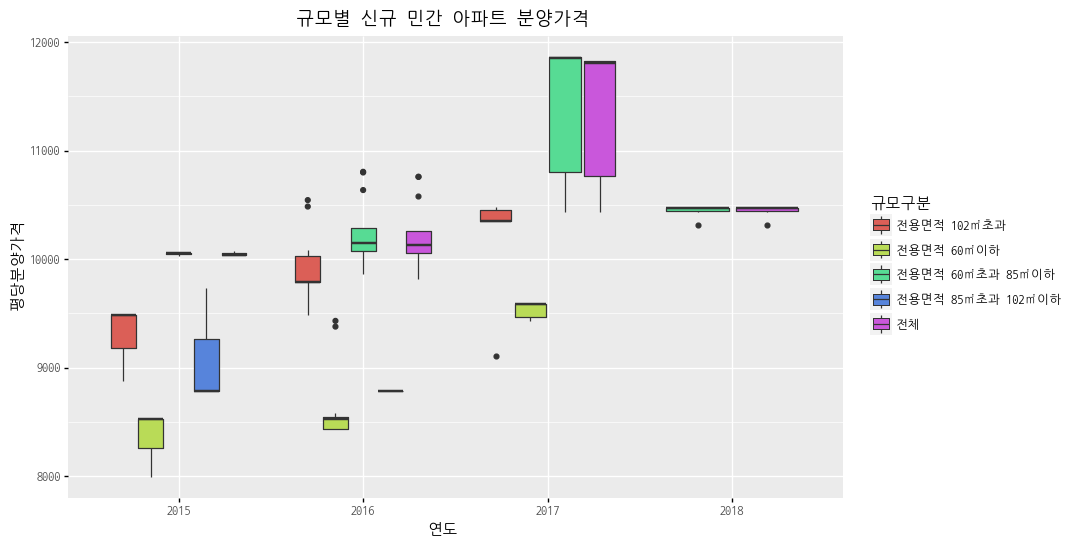

<ggplot: (159922955952)>

In [56]:
ggplot(pre_sale_ulsan, aes(x='연도', y='평당분양가격', fill='규모구분')) \
    + geom_boxplot() \
    + ggtitle('규모별 신규 민간 아파트 분양가격') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=[10, 6])